### Задача.

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание сверточной нейронной сети.
5. Обучение сверточной нейронной сети.

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import utils
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1579 - accuracy: 0.9521 - val_loss: 0.0449 - val_accuracy: 0.9856
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0326 - val_accuracy: 0.9886
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0337 - val_accuracy: 0.9892
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0380 - val_accuracy: 0.9885
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0364 - val_accuracy: 0.9901
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0347 - val_accuracy: 0.9903
Epoch 

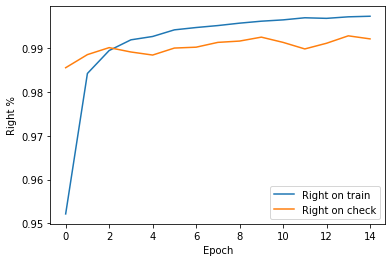

In [0]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test), verbose=1)
plt.plot(history.history['accuracy'], label='Right on train')
plt.plot(history.history['val_accuracy'], label='Right on check')
plt.xlabel('Epoch')
plt.ylabel('Right %')
plt.legend()
plt.show()